In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import AffinityPropagation
import glob
from pattern.nl import parse, split
from collections import Counter
from gensim.models import KeyedVectors
# Need the interactive Tools for Matplotlib
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.manifold import TSNE
import networkx as nx

C:\ProgramData\Anaconda3\lib\site-packages\gensim\utils.py:1212: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
os.chdir('D:/Rampen/models/periods')
l = sorted(glob.glob('*.w2v'))
l

['model-1750-1779.w2v',
 'model-1780-1809.w2v',
 'model-1810-1829.w2v',
 'model-1830-1850.w2v']

In [3]:
def GetNetwork(word, model):
    
    dft = pd.DataFrame()
    
    for wl1 in list(dict(model.most_similar(word, topn=10)).keys()):

        for wl2 in list(dict(model.most_similar(wl1, topn=10)).keys()):
            
            for wl3 in list(dict(model.most_similar(wl2, topn=10)).keys()):
                
                for wl4 in list(dict(model.most_similar(wl3, topn=10)).keys()):
                    source = wl3
                    target = wl4
                    t = pd.DataFrame([source, target]).T
                    dft = dft.append(t)
    
    dft.columns = ['source', 'target']
   
    return dft

In [5]:
os.chdir('D:/Rampen/models/periods')
for modelz in l:
    model = KeyedVectors.load(modelz)
    dm = GetNetwork('wanorde',model)
    cnt = dm.target.value_counts()
    v = cnt[(cnt.index != 0) & (cnt >= 10)].index.values
    d2 = dm.query("target in @v")
    os.chdir('C:/Users/Ruben/Documents/Artikelen/Disasters/analysis')
    fn = modelz[6:-4] + "_" + 'nw_wanorde' + ".csv"
    d2.to_csv(fn,index=False)
    os.chdir('D:/Rampen/models/periods')


C:\ProgramData\Anaconda3\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [7]:
dm

,source,target
0,onheilen,rampen
0,onheilen,onheylen
0,onheilen,uitwerkingen
0,onheilen,fchadelyke
0,onheilen,onderdrukkingen
0,onheilen,bekommeringen
0,onheilen,afwenden
0,onheilen,ondernemingen
0,onheilen,gevreesde
0,onheilen,drukkende


C:\ProgramData\Anaconda3\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


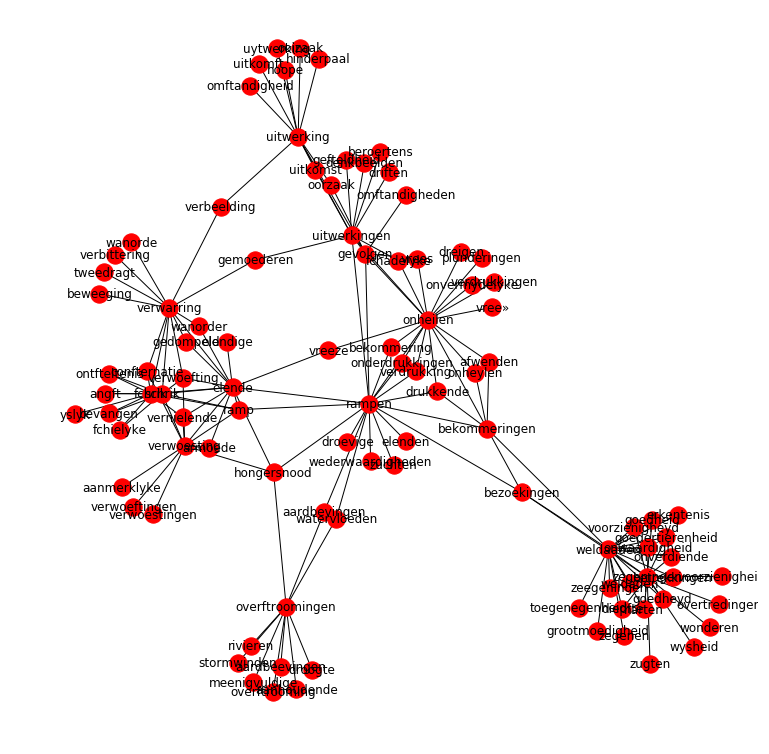

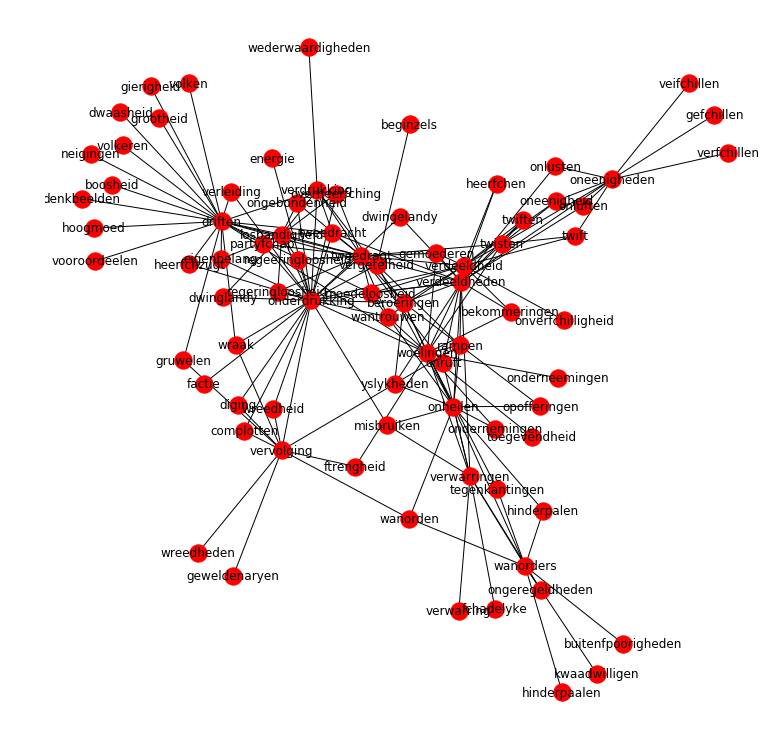

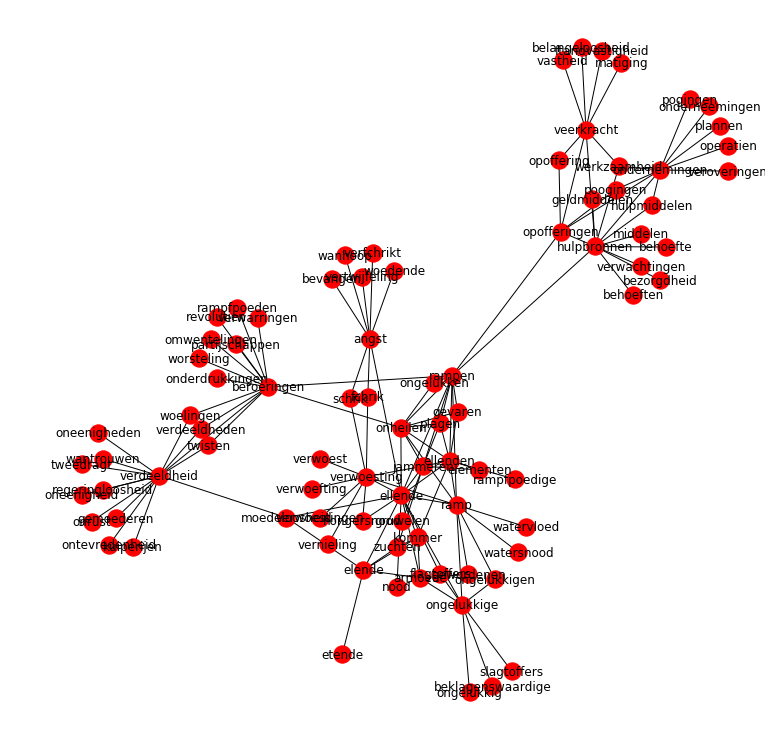

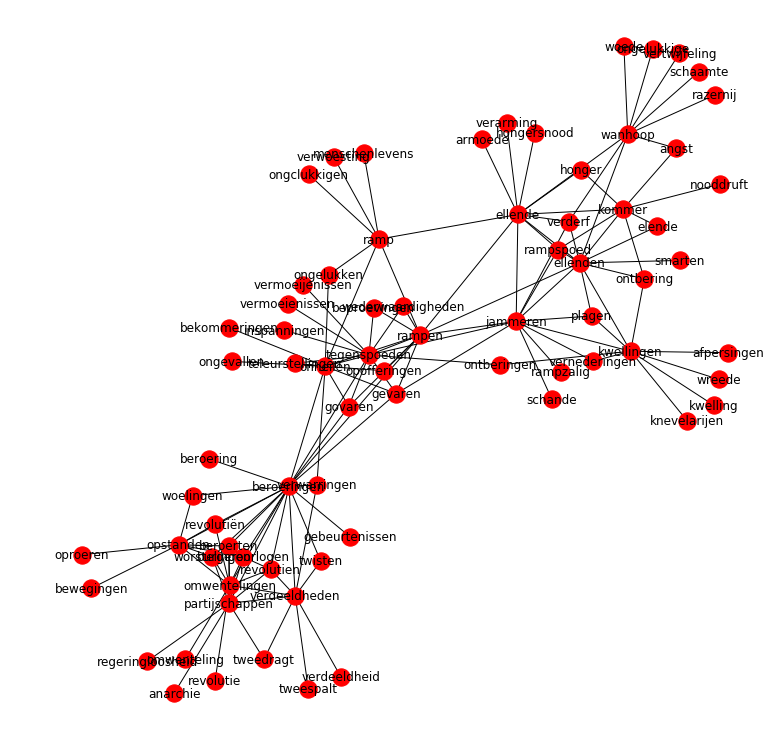

In [27]:
for m in l:
    m = KeyedVectors.load(m)
    dm = GetNetwork('rampen',m)
    cnt = dm.target.value_counts()
    v = cnt[(cnt.index != 0) & (cnt >= 40)].index.values
    d2 = dm.query("target in @v")
    H = nx.Graph(list(zip(d2['source'],d2['target'])))
    plt.figure(figsize=(10,10))
    print(m)
    nx.draw(H, with_labels=True)

In [29]:
# position is stored as node attribute data for random_geometric_graph
pos = nx.get_node_attributes(H, 'pos')

# find node near center (0.5,0.5)
dmin = 1
ncenter = 0
for n in pos:
    x, y = pos[n]
    d = (x - 0.5)**2 + (y - 0.5)**2
    if d < dmin:
        ncenter = n
        dmin = d

# color by path length from node near center
p = dict(nx.single_source_shortest_path_length(H, ncenter))

plt.figure(figsize=(8, 8))
nx.draw_networkx_edges(G, pos, nodelist=[ncenter], alpha=0.4)
nx.draw_networkx_nodes(G, pos, nodelist=list(p.keys()),
                       node_size=80,
                       node_color=list(p.values()),
                       cmap=plt.cm.Reds_r)

plt.xlim(-0.05, 1.05)
plt.ylim(-0.05, 1.05)
plt.axis('off')
plt.show()

NodeNotFound: Source 0 is not in G

In [24]:
nx.single_source_shortest_path_length(H, ncenter)